# Avaliação : 

O objetivo deste projeto é criar um modelo em que classifica um comentário em tóxicos ou não-tóxicos. Serão avaliados diferentes aspectos neste projeto: tanto a capacidade de apresentar e interpretar informações, como o pré-processamento, treinamento e avaliação dos resultados

Library Imports

In [42]:
import pandas as pd 
import numpy as np 
# Graphics tools 
import matplotlib.pyplot as plt
import seaborn as sns
# Vader SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Metrics for analyze
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay


# Conjunto de dados:

O conjunto de dados a ser utilizado nesta avaliação é uma sub-amostra de um conjunto de dados público disponível no Kaggle. Ele é composto por comentários da Wikipedia que foram rotulados em diferentes tipos de toxidade. O conjunto de dados foi adaptado para ter somente comentários tóxicos e não-tóxicos.


Test DataSet import 


In [43]:
train_df = pd.read_csv(r'C:\Users\Rícharde\Desktop\Python IA\Python-IA-Dell-Lead-\Final\train_binary_small.csv')
train_df.head(10)

,id,comment_text,Toxic
0,0028d62e8a5629aa,All of my edits are good. Cunts like you who ...,Toxic
1,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,Toxic
2,00b77cb600c897b4,"""\n\nAnd you are? Let me know when you've craw...",Toxic
3,00c0b8ed05ed7833,Fuck off\n\nYou are NOT an administrator. You ...,Toxic
4,00d7a73eb033ee5e,"Have you seen the reference to their claim, yo...",Toxic
5,011d0c0a6c8e5765,I NEVER FUCKING MADE THIS MOTHER FUCKING ARTIC...,Toxic
6,0122aba9f97885cd,There are many broken nostrils in this pancreas,Non-Toxic
7,016aa1af4fa90e8b,"""\n\nElvis... Crying in the Chapel Feudalist """,Non-Toxic
8,019ab9a91e7fcdbe,Are you fucker mother fucker have nothing to d...,Toxic
9,01ce75675a501e50,"""\\nYou wasted your own time! Take this advice...",Toxic


# Data analysis:

Checking null values

In [44]:
train_df.isnull().sum()

id              0
comment_text    0
Toxic           0
dtype: int64

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2000 non-null   object
 1   comment_text  2000 non-null   object
 2   Toxic         2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


Target Count 

Toxic        1500
Non-Toxic     500
Name: Toxic, dtype: int64


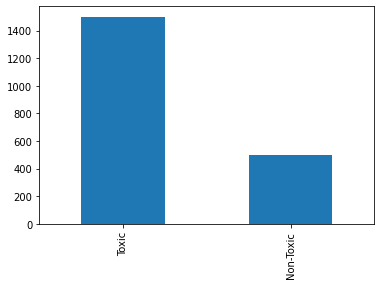

In [46]:
train_df.Toxic.value_counts().plot(kind='bar') 
print(train_df.Toxic.value_counts())

> We can see that we have unbalanced data. We have more data classified as toxic than non-toxic

Removing ID 

In [47]:
train_df.drop(columns=['id'],inplace=True)

In [48]:
train_df.head(10)

,comment_text,Toxic
0,All of my edits are good. Cunts like you who ...,Toxic
1,you are a stupid fuck \n\nand your mother's cu...,Toxic
2,"""\n\nAnd you are? Let me know when you've craw...",Toxic
3,Fuck off\n\nYou are NOT an administrator. You ...,Toxic
4,"Have you seen the reference to their claim, yo...",Toxic
5,I NEVER FUCKING MADE THIS MOTHER FUCKING ARTIC...,Toxic
6,There are many broken nostrils in this pancreas,Non-Toxic
7,"""\n\nElvis... Crying in the Chapel Feudalist """,Non-Toxic
8,Are you fucker mother fucker have nothing to d...,Toxic
9,"""\\nYou wasted your own time! Take this advice...",Toxic


Analysing duplicates

In [49]:
print('Duplicates sum :', train_df.duplicated().sum())
train_df.drop_duplicates()

Duplicates sum : 0


,comment_text,Toxic
0,All of my edits are good. Cunts like you who ...,Toxic
1,you are a stupid fuck \n\nand your mother's cu...,Toxic
2,"""\n\nAnd you are? Let me know when you've craw...",Toxic
3,Fuck off\n\nYou are NOT an administrator. You ...,Toxic
4,"Have you seen the reference to their claim, yo...",Toxic
...,...,...
1995,"""\nARE YOU FUCKING RETARDED?\n\nPlease do not ...",Toxic
1996,"Shut up, you button!",Toxic
1997,Hey alabamoy boy why dont you stick your head ...,Toxic
1998,"Walter Mercado \n\nAntonio, quite frankly, you...",Toxic


# Etapa de experimentos com diferentes modelos
#### Devem ser realizados experimentos iniciais considerando diferentes métodos de classificação para determinar o modelo mais adequado para o problema em questão:

Without preprocecssing using Vader 

> I understand that VADER was built to perform a sentiment analysis without the need for preprocessing, we will test this tool with the text as it was made available.

In [50]:
def Applying_Vader(DataFrame,colun):
    sid = SentimentIntensityAnalyzer()
    DataFrame['scores'] = DataFrame[colun].apply(lambda colun: sid.polarity_scores(colun))
    DataFrame['compound'] = DataFrame['scores'].apply(lambda scores: scores['compound'])    
    return DataFrame


In [51]:
# Applying on train df dataset
train_df = Applying_Vader(train_df,'comment_text')
train_df.head(15)

,comment_text,Toxic,scores,compound
0,All of my edits are good. Cunts like you who ...,Toxic,"{'neg': 0.19, 'neu': 0.618, 'pos': 0.193, 'com...",-0.2023
1,you are a stupid fuck \n\nand your mother's cu...,Toxic,"{'neg': 0.708, 'neu': 0.292, 'pos': 0.0, 'comp...",-0.9022
2,"""\n\nAnd you are? Let me know when you've craw...",Toxic,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'comp...",-0.8225
3,Fuck off\n\nYou are NOT an administrator. You ...,Toxic,"{'neg': 0.228, 'neu': 0.772, 'pos': 0.0, 'comp...",-0.5750
4,"Have you seen the reference to their claim, yo...",Toxic,"{'neg': 0.054, 'neu': 0.946, 'pos': 0.0, 'comp...",-0.6440
5,I NEVER FUCKING MADE THIS MOTHER FUCKING ARTIC...,Toxic,"{'neg': 0.26, 'neu': 0.74, 'pos': 0.0, 'compou...",-0.8107
6,There are many broken nostrils in this pancreas,Non-Toxic,"{'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'comp...",-0.4767
7,"""\n\nElvis... Crying in the Chapel Feudalist """,Non-Toxic,"{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'comp...",-0.6124
8,Are you fucker mother fucker have nothing to d...,Toxic,"{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound...",-0.9186
9,"""\\nYou wasted your own time! Take this advice...",Toxic,"{'neg': 0.252, 'neu': 0.686, 'pos': 0.062, 'co...",-0.8614


Analyzing VADER result

In [52]:
def vader_result(DataFrame,posLabel,negLabel,label):
    DataFrame['compound_result'] = DataFrame['compound'].apply(lambda comp: posLabel if comp >=0 else negLabel)
    return classification_report(DataFrame[label],DataFrame['compound_result']) 

In [53]:
print(vader_result(train_df,'Toxic','Non-Toxic','Toxic'))

              precision    recall  f1-score   support

   Non-Toxic       0.11      0.27      0.16       500
       Toxic       0.54      0.29      0.38      1500

    accuracy                           0.28      2000
   macro avg       0.33      0.28      0.27      2000
weighted avg       0.43      0.28      0.32      2000

